<img src="entete2.png">

![We Can Use Giphy & Emojis Too](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)




<h1><font color='orange'>Partie Théorique : </font></h1>

<h3> L’algorithme k-means: </h3>
Est l’algorithme de clustering le plus connu et le plus utilisé, du fait de sa simplicité de mise en œuvre.<br> 
L’algorithme itératif renvoie une partition des données dont le résultat est un ensemble de clusters compacts et clairement séparés.

voici un exemple de segmentation de l'image avec l'algorithme k-means :

<img src="exp1.png">

<h1><font color='orange'>Partie Pratique : </font></h1>

Dans la première partie , on s'interesse à l'effet de clustering sur l'image en modifiant a chaque fois le nombre de cluster dans l'algorithme de k-means, on essai avec un nombre de cluster = [2 .. 10]<br>
<h4>Tout d'acord on va installer la bilbliothéque "OPEN-CV" </h4>

In [38]:
!pip install opencv-python

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans,MiniBatchKMeans
import skimage.io
from skimage.restoration import denoise_tv_chambolle
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def segm(k):
#Charger l'image
    image = cv2.imread('sponjbob1.png')
    assert not isinstance(image,type(None)), 'image not found'
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)
    plt.figure(figsize=(10,11))

    cv2.imwrite('sponjbob2.png', quant)
    img1 = cv2.imread('sponjbob2.png')
    return plt.imshow(img1)
plt.show()
interact(segm,k=widgets.IntSlider(min=2, max=10, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…


> <font color='red'><b> On remarque que lorsque le nombre de cluster = 2 , on trouve les deux couleurs dominants dans l'image, et à chaque fois qu'on augmente le nombre de cluster, l'image segmentée sera plus proche à l'image originale <br>
> ==> nbre de cluster augmente ==> image segmentée = image originale </b></font>


La deuxième partie est consacrée à l'image bruitée, on va ajouter quelques type de bruits à notre image dans le but de détérminer l'effet et les conséquences de ces bruits <br>
Pour cela on utilise la fonction <b>random_noise</b> du module <b>util</b> de la bibliothéque <b>skimage</b>.

In [48]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="sponjbob1.png"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="sponjbob1.png"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 
plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt", "pepper", "s&p", "speckle",None]);

 

plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'pepper…

Dans la derniére partie on va essayer d'éliminer la bruit puis on fait la segmentation de chaque image et on compare les images segmentées obtenue avec celles de la premiére partie 

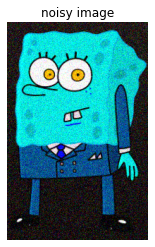

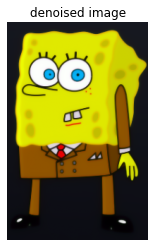

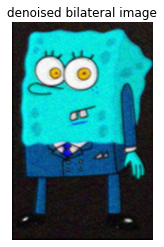

In [49]:
import skimage.io
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral



def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


image_orig=cv2.imread('sponjbob1.png')
noisy_image = random_noise(image_orig)
show_image(noisy_image, 'noisy image')

# total variation filter denoising
denoised_image = denoise_tv_chambolle(img, weight=0.1, multichannel=True)
show_image(denoised_image, 'denoised image')


# bilateral filter denoising
denoised_bilateral_image = denoise_bilateral(noisy_image, multichannel=True)
show_image(denoised_bilateral_image, 'denoised bilateral image')

Dans la bibliothéque <b>skimage</b> on trouve deux célèbres fonctions pour elimier la bruit : denoise_tv_chambolle() ==> pour éliminer la variation totale de bruit & denoise_bilateral() ==> pour éliminer la bruit bilatérale 

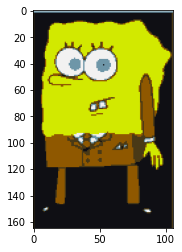

In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import skimage

image= cv2.imread('denoised_image.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
cv2.imwrite('denoised_image2.jpg', segmented_image)
# show the image
plt.imshow(segmented_image)
plt.show()

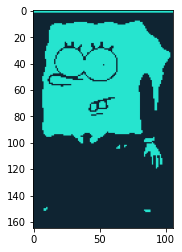

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import skimage

image= cv2.imread('bilatéral_denoised_image.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
cv2.imwrite('bilatéral_denoised_image.jpg', segmented_image)
# show the image
plt.imshow(segmented_image)

<h1><font color='orange'>Conclusion: </font></h1>

> > <font color='red'><b> Objectif atteint ! </b> <br> - Je comprend que le clustering est une étape fondamentale dans data mining et l'exploitation des données pour determiner les couleurs dominants dans l'image </font><br>
 
> > <font color='red'> - Je comprend que lorqu'on augmente le nombre de clusters , l'image segmentée proche de l'image originale </font><br>
> > <font color='red'> - Je comprend aussi qu'il ya plusieurs types de bruits qui peuvent affecter l'image et que la performance de clustering diminue lorsque l'image est bruité meme lorsqu'on essaie d'éliminer cette bruit</font><br>